In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('Automobile price data _Raw_.csv')
pd.set_option('display.max_columns', None)
# df.head()


In [146]:
# for i in df.columns:
    
#     print(i,df[i].unique())

# <br><br> <font color=purple>**Replacing '?' with NaN and then filled missing values by mean** </font><br><br>

In [147]:
df = df.replace('?',np.NAN) 
# df.isnull().sum()

In [148]:
# df.corr()    #checking correlation


## <font color=black>checking bivariate relation between price and engine size<font>

In [149]:
# df[["engine-size", "price"]].corr()


## Correlation analysis through heatmap and visulisation  

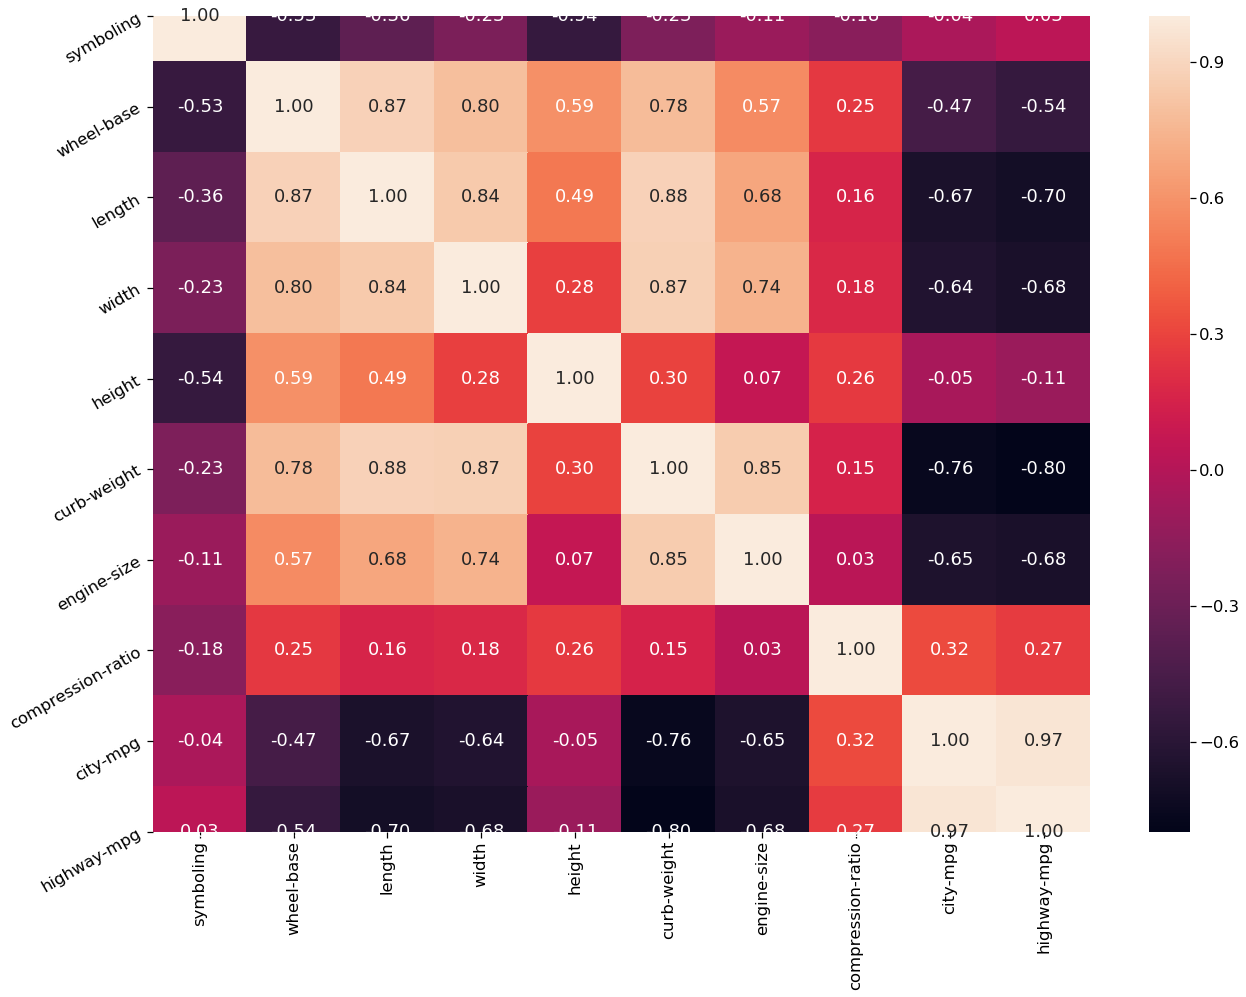

In [151]:
# import seaborn as sns
corr = df.corr()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(21,15))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Carmaker contibution in manufacturing (percentage) 

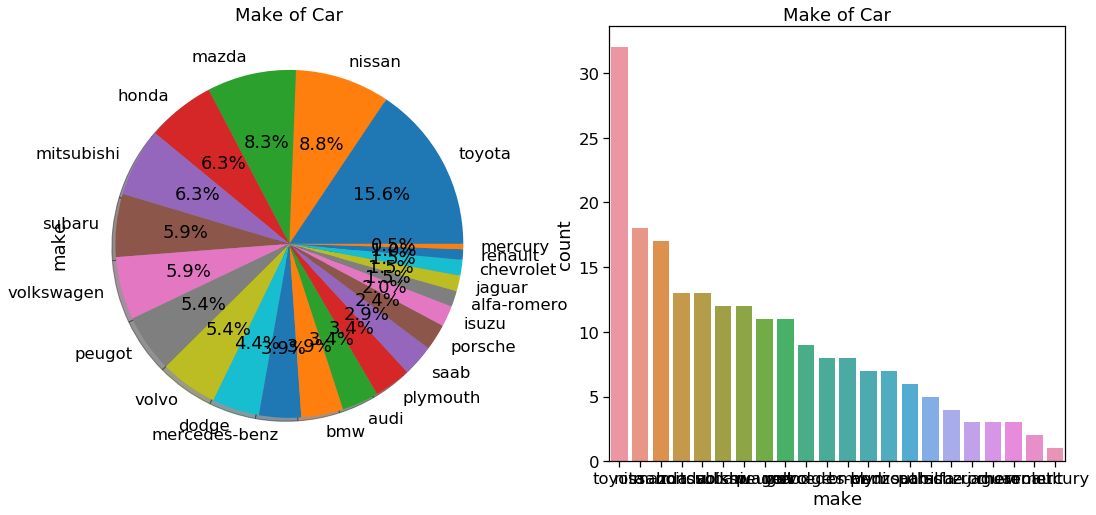

In [87]:
f,ax=plt.subplots(1,2,figsize=(18,8))
print(ax)
df['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
#ax[0].set_ylabel('Count')
sns.countplot('make',data=df,ax=ax[1],order=df['make'].value_counts().index)
ax[1].set_title('Make of Car')
#ax[1].set_xticklabels(rotation=30)
plt.show()

# <br><br><font color=darkred>Univariate Analysis Part-1<font><br><br>

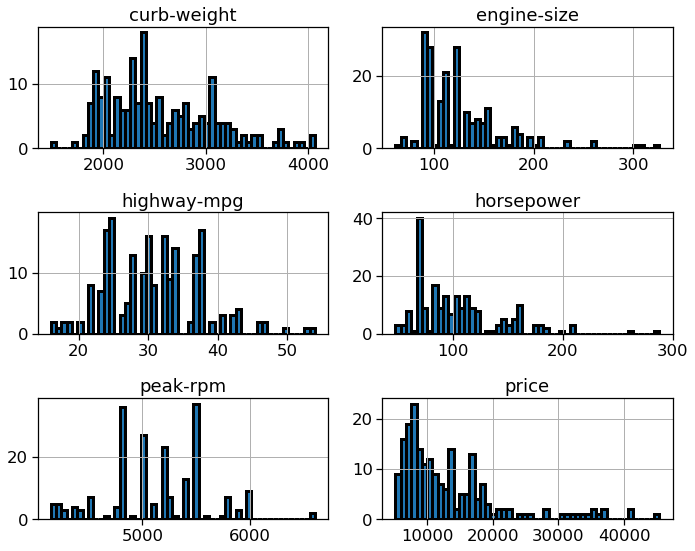

In [92]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=50,linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

# <br><br><br><font color=darkred>Univariate Analysis Part-2<font><br><br><br>

-----------------------------------------------------------
symboling


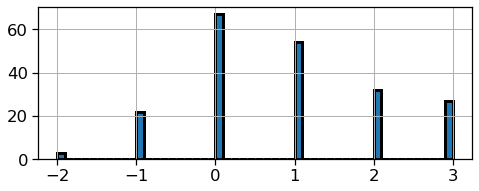

-----------------------------------------------------------
-----------------------------------------------------------
normalized-losses


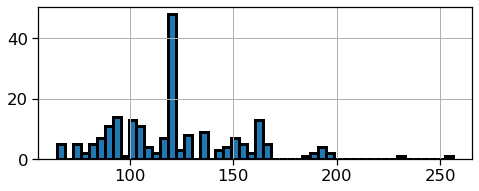

-----------------------------------------------------------
-----------------------------------------------------------
make


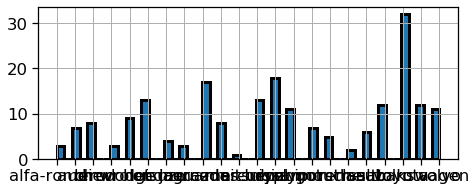

-----------------------------------------------------------
-----------------------------------------------------------
fuel-type


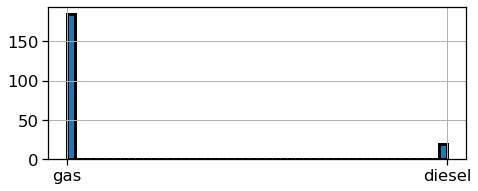

-----------------------------------------------------------
-----------------------------------------------------------
aspiration


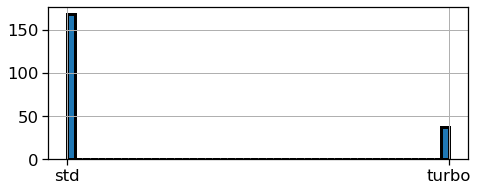

-----------------------------------------------------------
-----------------------------------------------------------
num-of-doors


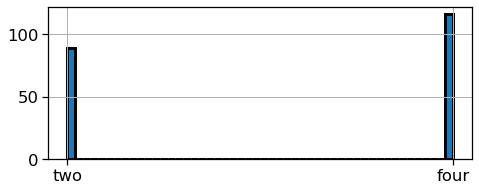

-----------------------------------------------------------
-----------------------------------------------------------
body-style


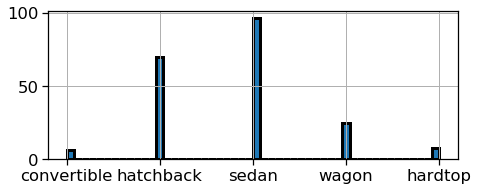

-----------------------------------------------------------
-----------------------------------------------------------
drive-wheels


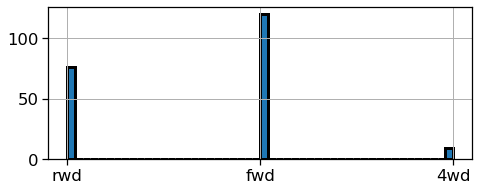

-----------------------------------------------------------
-----------------------------------------------------------
engine-location


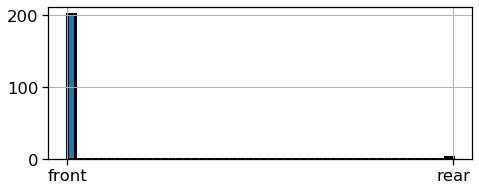

-----------------------------------------------------------
-----------------------------------------------------------
wheel-base


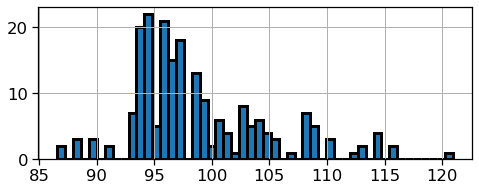

-----------------------------------------------------------
-----------------------------------------------------------
length


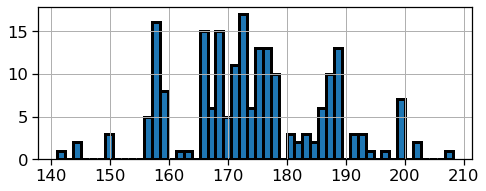

-----------------------------------------------------------
-----------------------------------------------------------
width


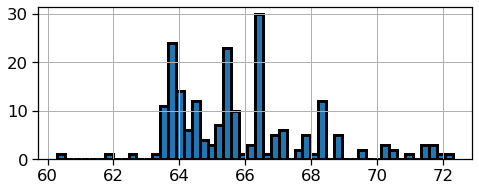

-----------------------------------------------------------
-----------------------------------------------------------
height


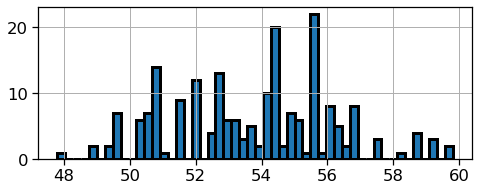

-----------------------------------------------------------
-----------------------------------------------------------
curb-weight


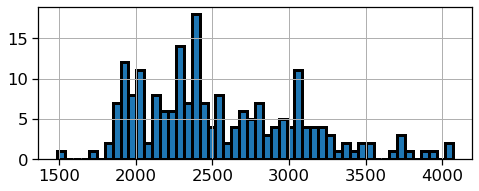

-----------------------------------------------------------
-----------------------------------------------------------
engine-type


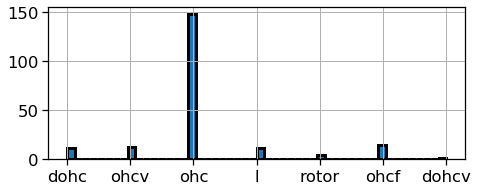

-----------------------------------------------------------
-----------------------------------------------------------
num-of-cylinders


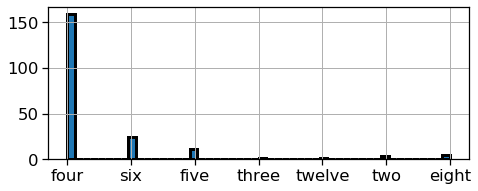

-----------------------------------------------------------
-----------------------------------------------------------
engine-size


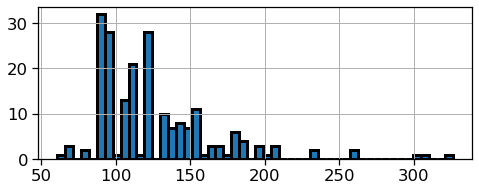

-----------------------------------------------------------
-----------------------------------------------------------
fuel-system


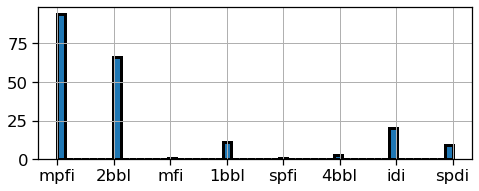

-----------------------------------------------------------
-----------------------------------------------------------
bore


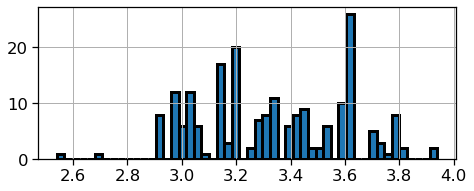

-----------------------------------------------------------
-----------------------------------------------------------
stroke


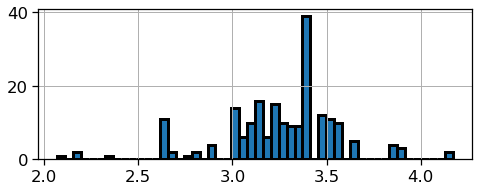

-----------------------------------------------------------
-----------------------------------------------------------
compression-ratio


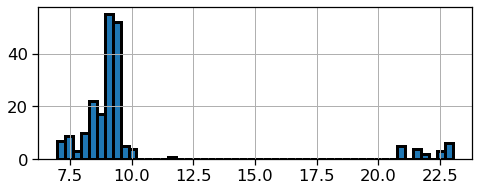

-----------------------------------------------------------
-----------------------------------------------------------
horsepower


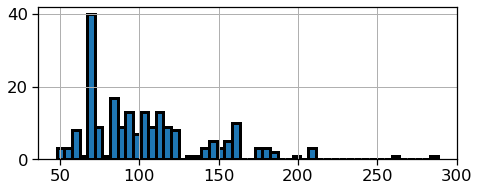

-----------------------------------------------------------
-----------------------------------------------------------
peak-rpm


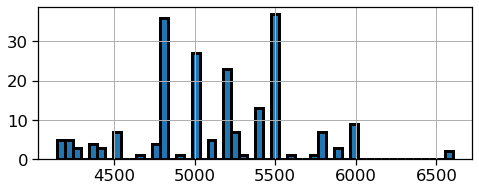

-----------------------------------------------------------
-----------------------------------------------------------
city-mpg


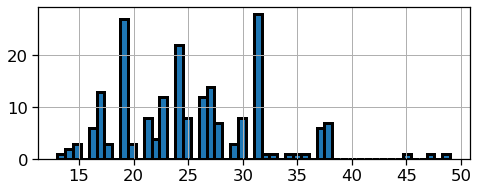

-----------------------------------------------------------
-----------------------------------------------------------
highway-mpg


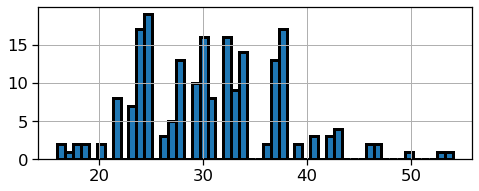

-----------------------------------------------------------
-----------------------------------------------------------
price


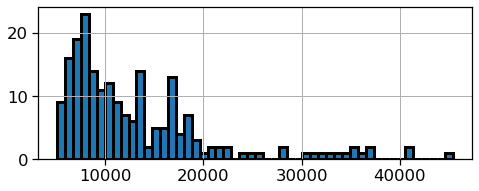

-----------------------------------------------------------


In [101]:
for i in df.columns:
    print('-----------------------------------------------------------')
    print(i)
    df[i].hist(figsize=(7,3),bins=50,linewidth='3',edgecolor='k')
    plt.tight_layout()
    plt.show()
    print('-----------------------------------------------------------')


# <br><br><font color=darkred>Categorical feature treatment One Hot Encoding <font><br><br>

In [121]:
object_col = []
for i in df.columns:
    if df[i].dtype == object:
        object_col.append(i)

In [122]:
print(object_col)

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [123]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


In [125]:
enc_df = pd.DataFrame(enc.fit_transform(df[object_col]).toarray())

In [127]:
df = df.join(enc_df)
df.shape

(205, 86)

In [128]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [138]:
df.drop(object_col, axis=1,inplace=True)

In [154]:
# df.info()

TypeError: '<=' not supported between instances of 'float' and 'str'

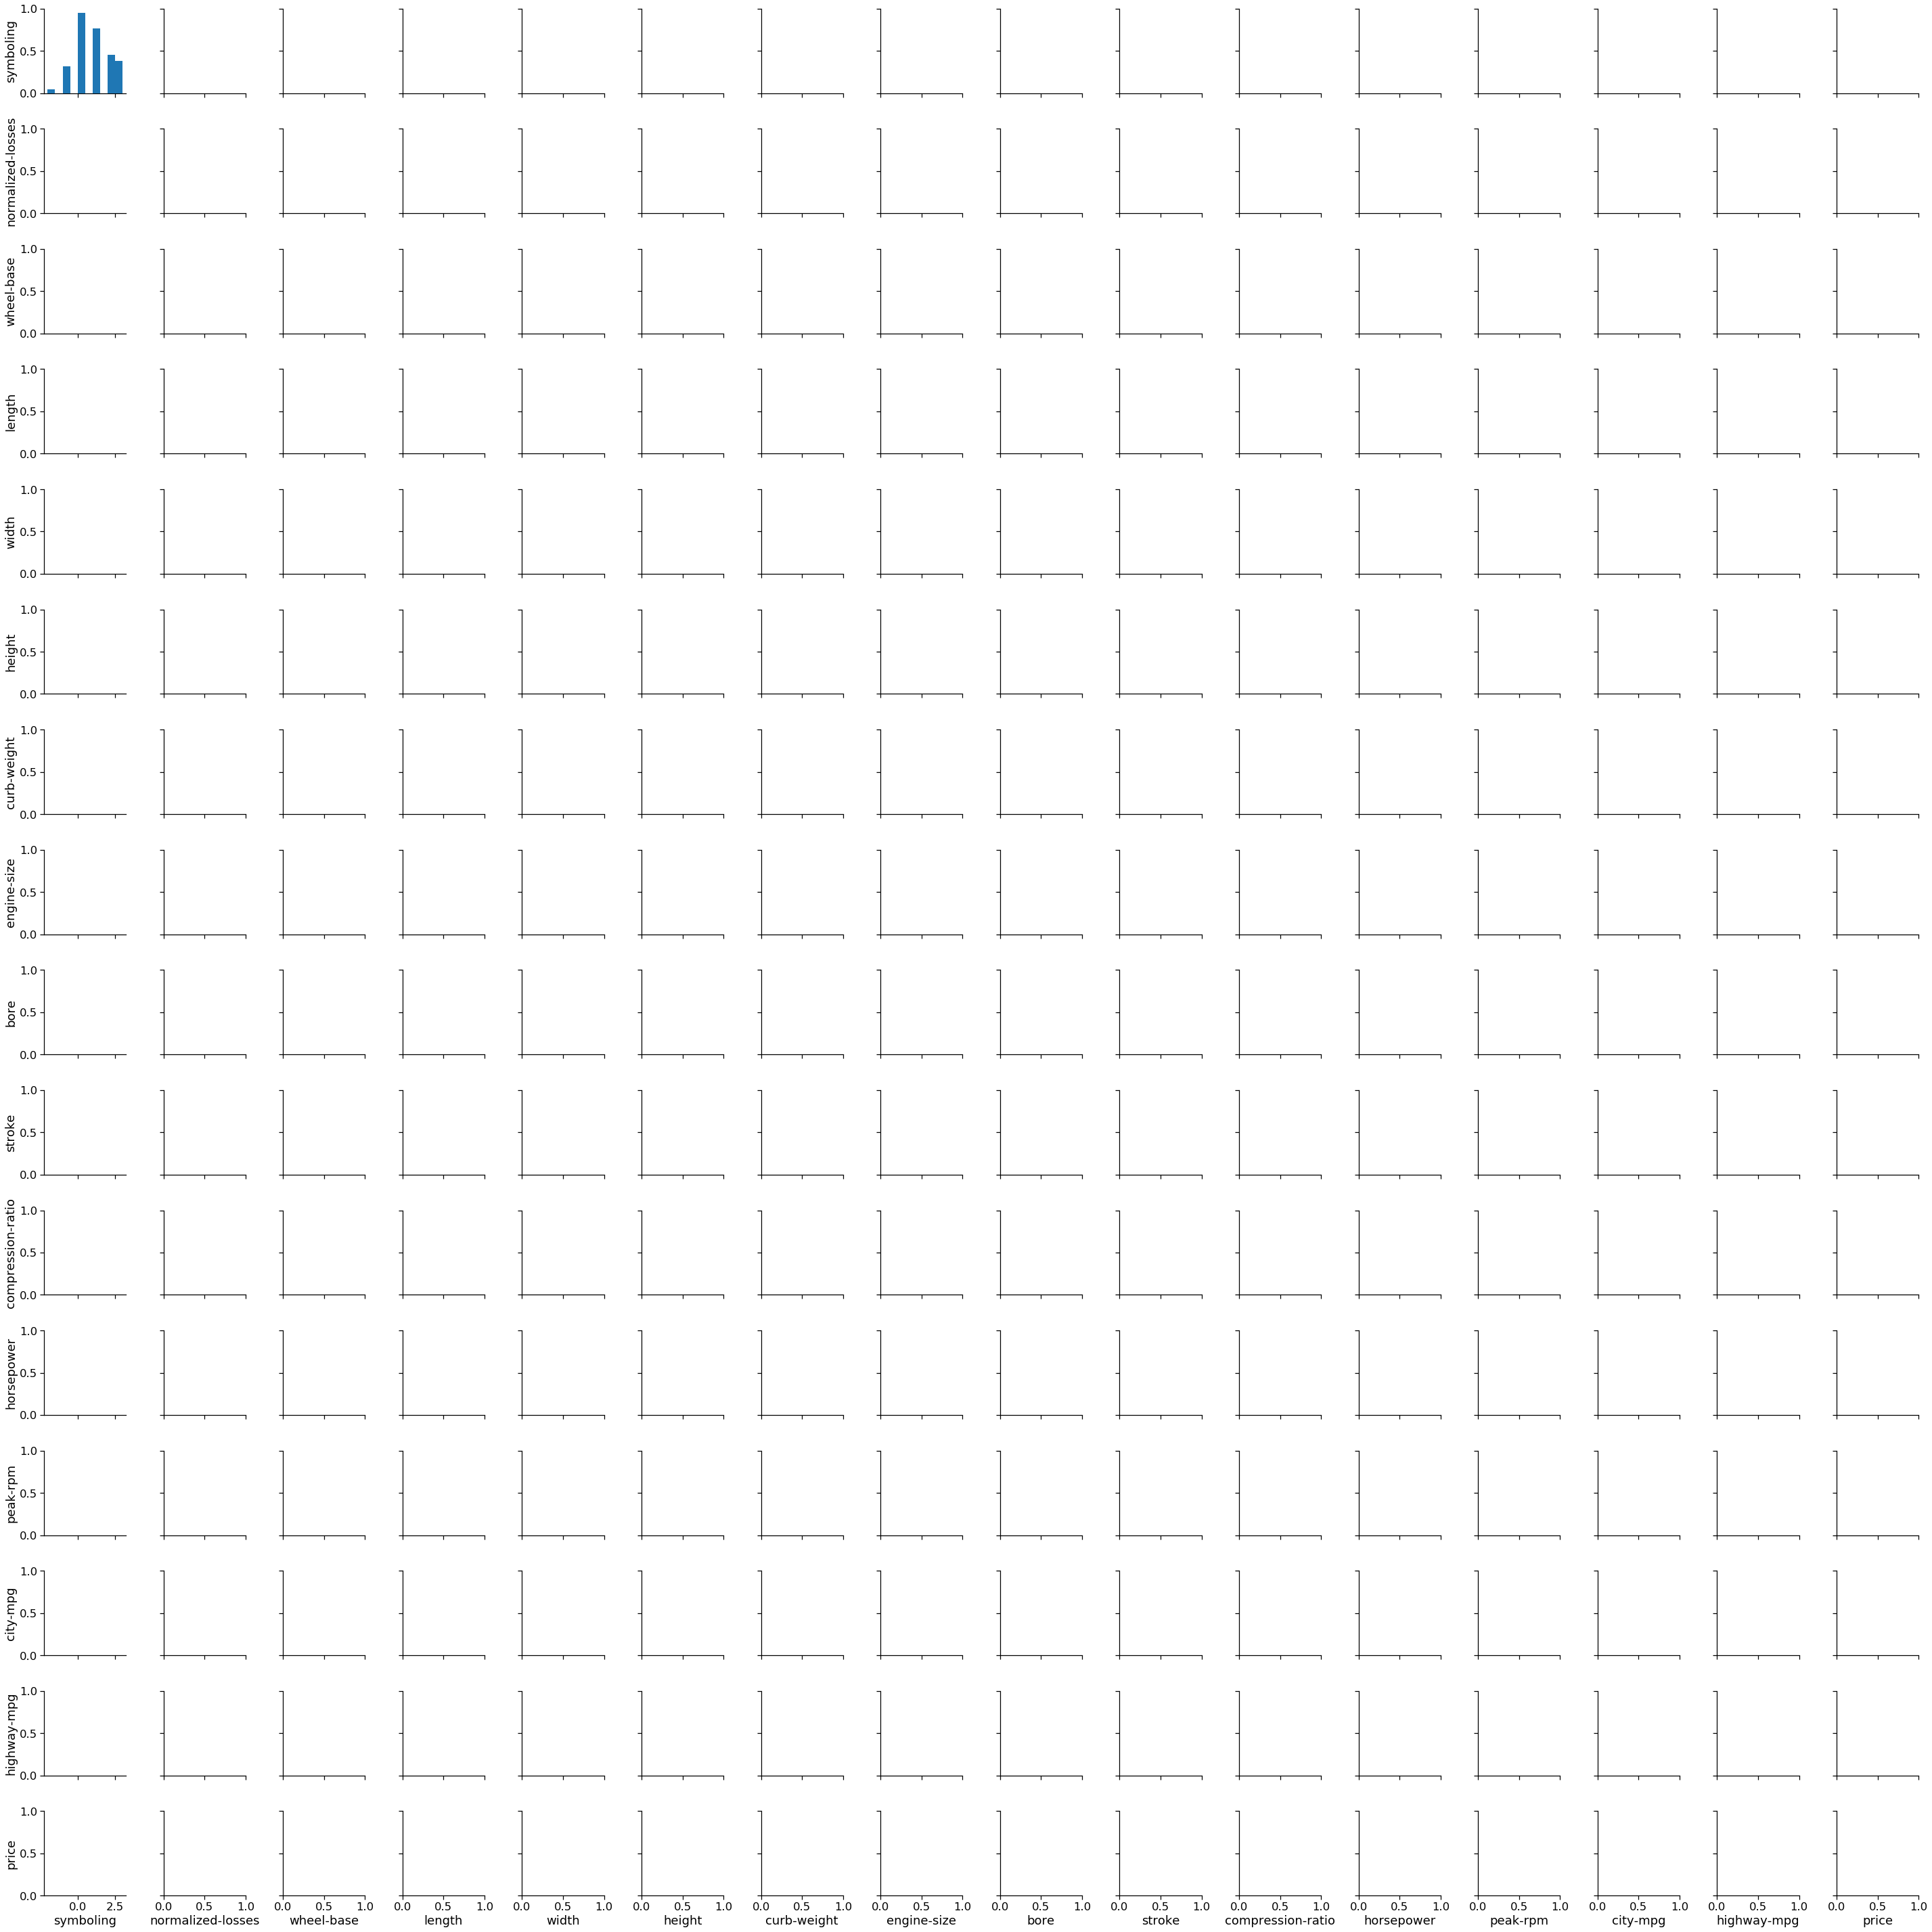

In [156]:
a = sns.pairplot(df)